In [3]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy import stats
from scipy.io import loadmat
from sklearn.cluster.bicluster import SpectralBiclustering, SpectralCoclustering

import cPickle

In [4]:
z_pearson = np.load('z_score_pearson_10second_dump.dump')

In [5]:
print len(z_pearson), len(z_pearson[0]), len(z_pearson[0][0])

339 63 63


In [6]:
channels = range(63)
interval = len(z_pearson)
index = 63*62/2 + 63
pearson_data = [[None for j in range(index)] for i in range(interval)]
print len(z_pearson), len(z_pearson[0]), len(z_pearson[0][0])
print len(pearson_data), len(pearson_data[0])

339 63 63
339 2016


In [7]:
def pearson_(interval):
    index_counter = 0
    for start in channels:
        for channel in channels:
            if start <= channel:
                pearson_data[interval][index_counter] = z_pearson[interval][start][channel]
                index_counter += 1
    print index_counter
            
            
# for i in range(2):
for i in range(interval):
    print 'Interval %i ' % i,
    pearson_(i)

Interval 0  2016
Interval 1  2016
Interval 2  2016
Interval 3  2016
Interval 4  2016
Interval 5  2016
Interval 6  2016
Interval 7  2016
Interval 8  2016
Interval 9  2016
Interval 10  2016
Interval 11  2016
Interval 12  2016
Interval 13  2016
Interval 14  2016
Interval 15  2016
Interval 16  2016
Interval 17  2016
Interval 18  2016
Interval 19  2016
Interval 20  2016
Interval 21  2016
Interval 22  2016
Interval 23  2016
Interval 24  2016
Interval 25  2016
Interval 26  2016
Interval 27  2016
Interval 28  2016
Interval 29  2016
Interval 30  2016
Interval 31  2016
Interval 32  2016
Interval 33  2016
Interval 34  2016
Interval 35  2016
Interval 36  2016
Interval 37  2016
Interval 38  2016
Interval 39  2016
Interval 40  2016
Interval 41  2016
Interval 42  2016
Interval 43  2016
Interval 44  2016
Interval 45  2016
Interval 46  2016
Interval 47  2016
Interval 48  2016
Interval 49  2016
Interval 50  2016
Interval 51  2016
Interval 52  2016
Interval 53  2016
Interval 54  2016
Interval 55  2016
In

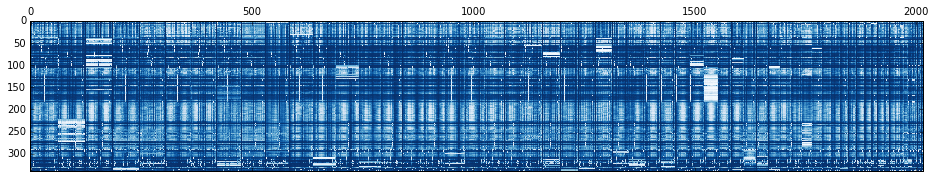

In [8]:
spectral_model = SpectralBiclustering()
spectral_model.fit(pearson_data)
# fit_data = p[np.argsort(spectral_model.row_labels_)]
# fit_data = fit_data[:, np.argsort(spectral_model.column_labels_)]
plt.matshow(pearson_data, cmap=plt.cm.Blues)
# plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.show()

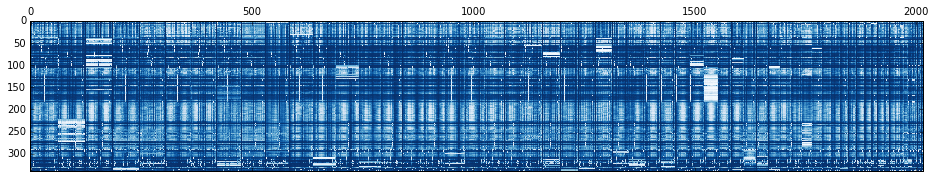

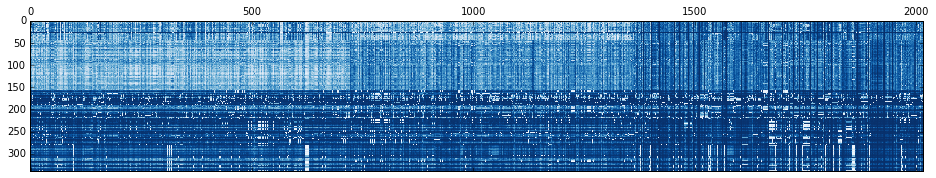

In [9]:
pearson_data = np.array(pearson_data)
spectral_model = SpectralBiclustering()
spectral_model.fit(pearson_data)
fit_data = pearson_data[np.argsort(spectral_model.row_labels_)]
fit_data = fit_data[:, np.argsort(spectral_model.column_labels_)]
plt.matshow(pearson_data, cmap=plt.cm.Blues)
plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.show()

In [12]:
import json as simplejson
with open('media/pearson_10s_z_2016.json', 'w+') as f:
    p = [[float(column) for column in row] for row in pearson_data]
    f.write(simplejson.dumps({'name': 's5d2nap', 'data': p}))

with open('media/pearson_10s_z_trans_2016.json', 'w+') as f:
    p = [[float(column) for column in row] for row in np.transpose(pearson_data)]
    f.write(simplejson.dumps({'name': 's5d2nap', 'data': p}))

In [ ]:
with open('media/pearson_10s_z_2016.json', 'w+') as f:
    p = [[float(column) for column in row] for row in pearson_data]
    f.write(simplejson.dumps({'name': 's5d2nap', 'data': p}))

with open('media/pearson_10s_z_trans_2016.json', 'w+') as f:
    p = [[float(column) for column in row] for row in np.transpose(pearson_data)]
    f.write(simplejson.dumps({'name': 's5d2nap', 'data': p}))